In [1]:
pip install numpy pandas sklearn xgboost

Note: you may need to restart the kernel to use updated packages.


In [52]:
import numpy as np
import pandas as pd
import os, sys
from sklearn.preprocessing import MinMaxScaler
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [22]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [23]:
#DataFlair - Read the data
df=pd.read_csv('C:\\parkinsons.data',index_col=False)
df.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


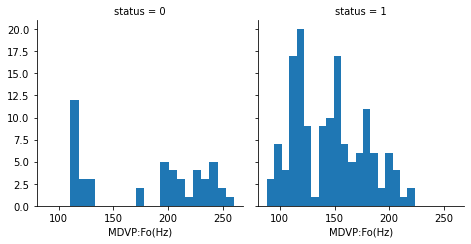

In [24]:
g = sns.FacetGrid(df, col='status', height=3.5, aspect=.95 )
g.map(plt.hist, 'MDVP:Fo(Hz)', bins=20)
#this graph shows Average vocal fundamental frequency in healthy and affected patients

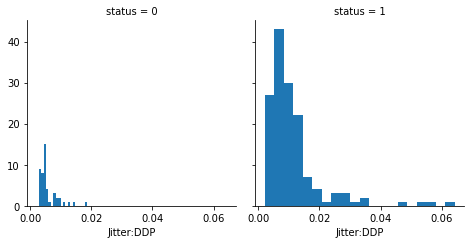

In [25]:
g = sns.FacetGrid(df, col='status',height=3.5, aspect=.95) 
g.map(plt.hist, 'Jitter:DDP', bins=20)
#in this we can see the significant difference in jitter of healthy and affected individuals

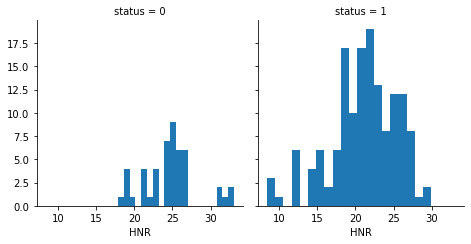

In [26]:
g = sns.FacetGrid(df, col='status', height=3.5, aspect=.95 )
g.map(plt.hist, 'HNR', bins=20)
# the count of harmonics-to-noise ratio is more in PD patients as comapred with healthy individuals

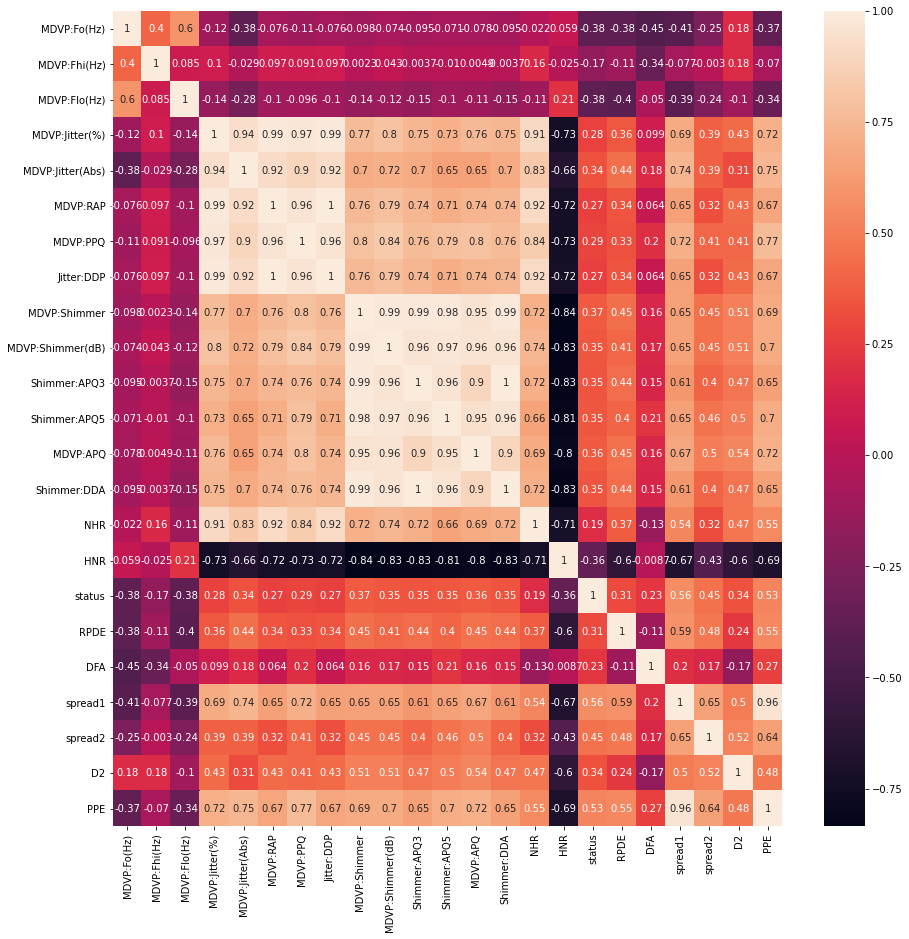

In [27]:
corr = df.corr()
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(),annot=True)#gives colour on bais of values. see the scale besides it.
plt.show()

In [28]:
#DataFlair - Get the features and labels
features=df.loc[:,df.columns!='status'].values[:,1:]
labels=df.loc[:,'status'].values

In [29]:
#DataFlair - Get the count of each label (0 and 1) in labels
print(labels[labels==1].shape[0], labels[labels==0].shape[0])

147 48


In [32]:
#DataFlair - Scale the features to between -1 and 1
scaler=MinMaxScaler((-1,1))
x=scaler.fit_transform(features)
y=labels

In [38]:
x_train, x_test, y_train, y_test = train_test_split( x, y, test_size=0.2, random_state=7)

In [39]:
#DataFlair - Train the model
model=XGBClassifier()
model.fit(x_train,y_train)

[14:42:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [40]:
# DataFlair - Calculate the accuracy
y_pred=model.predict(x_test)
print(accuracy_score(y_test, y_pred)*100)

94.87179487179486


In [41]:
from sklearn.ensemble import RandomForestClassifier
random_forest=RandomForestClassifier()
random_forest.fit(x_train,y_train)

RandomForestClassifier()

In [56]:
y_pred_test = random_forest.predict(x_test)
accuracy_score(y_test, y_pred_test)

0.8717948717948718

Confusion Matrix for Random Forest

[[ 3  4]
 [ 1 31]]


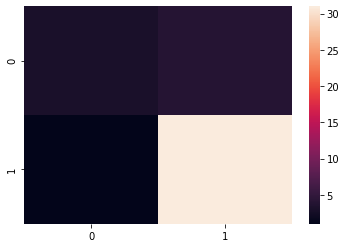

In [63]:
print("Confusion Matrix for Random Forest\n")
print(confusion_matrix(y_test, y_pred_test))
sns.heatmap(forest_confusion_matrix)
plt.show()

In [62]:
print("Classification Report for Random Forest\n")
print(classification_report(y_test,y_pred_test))


Classification Report for Random Forest

              precision    recall  f1-score   support

           0       0.75      0.43      0.55         7
           1       0.89      0.97      0.93        32

    accuracy                           0.87        39
   macro avg       0.82      0.70      0.74        39
weighted avg       0.86      0.87      0.86        39

